<a href="https://colab.research.google.com/github/jimenezjos/Prueba-de-Promedios/blob/main/PruebadePromediosFrecuencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación de la Prueba de los Promedios para Números Pseudoaleatorios

**Nombre del Estudiante:** Jiménez González José María

**Materia:** Simulación 1

## 1. Introducción teórica
La **Prueba de Promedios** es una prueba estadística que consiste en determinra si elconjunto de numero dados probienen de una distribución uniforme $x_i$ (($x_i) \sim U(0,1)$) es estadísticamente igual a la media esperada de 0.5.

### Hipótesis
* **$H_0$ (Nula):** $\mu_{r} = 0.5$ (Los números tienen la media correcta).
* **$H_1$ (Alternativa):** $\mu_{r} \neq 0.5$ (Los números no tienen la media correcta).

### Estadístico de Prueba ($Z_0$)
$$Z_0 = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

Donde:
* $\bar{x}$: Promedio de los datos.
* $\mu = 0.5$: Media esperada.
* $\sigma = \sqrt{\frac{1}{12}}$: Desviación estándar de una distribución uniforme (0,1).
* $n$: Cantidad de datos.

### Criterio de Aceptación
Si $|Z_0| < Z_{\alpha/2}$, no se rechaza $H_0$.

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
# Configuración de estilo para gráficos
plt.style.use('ggplot')

In [3]:
datos_np = [
0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

In [8]:

# Importamos la función específica para la prueba Z
from statsmodels.stats.weightstats import ztest

datos_np = np.array(datos_np)

# 1. Nivel de confianza
# Define aquí el nivel de confianza
nivel_confianza = 0.95

# Calculamos el alfa
alfa = 1 - nivel_confianza

print(f"Nivel de Confianza: {nivel_confianza*100}%")
print(f"Alfa (α): {alfa:.4f}")
print("-" * 50)


# z_score: El valor del estadístico Z calculado.
# p_value: La probabilidad de obtener un resultado igual o más extremo.
# value=0.5: Es la media hipotética (H0) que queremos probar.

z_score, p_value = ztest(datos_np, value=0.5)


print("RESULTADOS DE LA PRUEBA DE PROMEDIOS")
print("-" * 50)
print(f"Media de la muestra:  {datos_np.mean():.5f}")
print(f"Media hipotesis (H0): 0.5")
print("-" * 50)
print(f"Estadístico Z:        {z_score:.5f}")
print(f"P-valor (p-value):    {p_value:.5f}")
print("-" * 50)



# Si p-valor > alfa: NO se rechaza H0 (Se acepta la prueba).
# Si p-valor < alfa: SE rechaza H0.

print("CONCLUSIÓN:")
if p_value > alfa:
    resultado = "APROBADA"
    print(f"ACEPTADA (p-value > α)")
    print(f"Como {p_value:.5f} > {alfa:.4f}, no hay evidencia para rechazar H0.")
    print("Los números generados tienen una media estadísticamente válida.")
else:
    resultado = "RECHAZADA"
    print(f"RECHAZADA (p-value < α)")
    print(f"Como {p_value:.5f} < {alfa:.4f}, se rechaza H0.")
    print("La media de los números no corresponde a la esperada.")

# Variables para la gráfica posterior (Celda 5)
# Nota: Statsmodels usa la desviación muestral. Para graficar límites teóricos,
# mantenemos el cálculo manual solo para las líneas visuales en la siguiente celda.
import scipy.stats as st
z_critico = st.norm.ppf(1 - alfa/2)
error_estandar = (1 / np.sqrt(12)) / np.sqrt(len(datos_np))
lim_inf = 0.5 - z_critico * error_estandar
lim_sup = 0.5 + z_critico * error_estandar
media = datos_np.mean()

Nivel de Confianza: 95.0%
Alfa (α): 0.0500
--------------------------------------------------
RESULTADOS DE LA PRUEBA DE PROMEDIOS
--------------------------------------------------
Media de la muestra:  0.48268
Media hipotesis (H0): 0.5
--------------------------------------------------
Estadístico Z:        -0.62418
P-valor (p-value):    0.53251
--------------------------------------------------
CONCLUSIÓN:
ACEPTADA (p-value > α)
Como 0.53251 > 0.0500, no hay evidencia para rechazar H0.
Los números generados tienen una media estadísticamente válida.


In [7]:
# Asumimos que la variable 'datos_np' (nuestros 100 números) ya está cargada en memoria.
# Si lo corres en un archivo nuevo, asegúrate de volver a declarar la lista de los 100 datos.

# 1. Parámetros iniciales
N = len(datos_np)
k = 5  # Número de intervalos según el pizarrón (0.0 a 1.0 en pasos de 0.2)


# 2. Definir los límites de los intervalos
# [0, 0.2, 0.4, 0.6, 0.8, 1.0]
limites = np.linspace(0, 1, k + 1)

# 3. Calcular Frecuencias Observadas (fo)
# np.histogram cuenta cuántos datos caen en cada "caja" (intervalo)
fo, _ = np.histogram(datos_np, bins=limites)

# 4. Calcular Frecuencias Esperadas (fe)
# Si es uniforme, esperamos la misma cantidad de datos en cada intervalo (N / k)
fe = np.full(k, N / k)

# 5. Calcular el estadístico para cada fila: (fo - fe)^2 / fe
chi_cuadrada_parcial = ((fo - fe)**2) / fe

# 6. Crear las etiquetas de los intervalos para la tabla
intervalos_labels = [f"[{limites[i]:.1f} - {limites[i+1]:.1f})" for i in range(k)]
# Ajuste visual para el último intervalo (cerrado en 1.0 según el pizarrón)
intervalos_labels[-1] = f"[{limites[-2]:.1f} - 1.0]"

# 7. Crear un DataFrame (Tabla) idéntico al del pizarrón
tabla_chi2 = pd.DataFrame({
    'Intervalo': intervalos_labels,
    'fo (Frecuencia Observada)': fo,
    'fe (Frecuencia Esperada)': fe,
    '(fo - fe)^2 / fe': chi_cuadrada_parcial
})

# 8. Mostrar la tabla
print("TABLA DE TRABAJO (CHI-CUADRADA)")
print("-" * 65)
display(tabla_chi2) # En Colab, display() hace que la tabla se vea muy bonita

# 9. Cálculos finales
chi_cuadrada_calculada = np.sum(chi_cuadrada_parcial)
grados_libertad = k - 1
chi_cuadrada_critica = st.chi2.ppf(1 - alfa, grados_libertad)

print("-" * 65)
print(f"Estadístico Calculado (Σ χ²): {chi_cuadrada_calculada:.4f}")
print(f"Valor Crítico (χ² de tablas): {chi_cuadrada_critica:.4f}")
print(f"Grados de libertad:           {grados_libertad}")
print("-" * 65)

# 10. Conclusión
print("CONCLUSIÓN:")
if chi_cuadrada_calculada < chi_cuadrada_critica:
    print(f"ACEPTADA: Como {chi_cuadrada_calculada:.4f} < {chi_cuadrada_critica:.4f}, no se rechaza H0.")
    print("Los números SÍ pasan la prueba de frecuencias (se distribuyen uniformemente).")
else:
    print(f"RECHAZADA: Como {chi_cuadrada_calculada:.4f} >= {chi_cuadrada_critica:.4f}, se rechaza H0.")
    print("Los números NO se distribuyen uniformemente.")

TABLA DE TRABAJO (CHI-CUADRADA)
-----------------------------------------------------------------


,Intervalo,fo (Frecuencia Observada),fe (Frecuencia Esperada),(fo - fe)^2 / fe
0,[0.0 - 0.2),21,20.0,0.05
1,[0.2 - 0.4),22,20.0,0.20
2,[0.4 - 0.6),19,20.0,0.05
3,[0.6 - 0.8),23,20.0,0.45
4,[0.8 - 1.0],15,20.0,1.25


-----------------------------------------------------------------
Estadístico Calculado (Σ χ²): 2.0000
Valor Crítico (χ² de tablas): 9.4877
Grados de libertad:           4
-----------------------------------------------------------------
CONCLUSIÓN:
ACEPTADA: Como 2.0000 < 9.4877, no se rechaza H0.
Los números SÍ pasan la prueba de frecuencias (se distribuyen uniformemente).


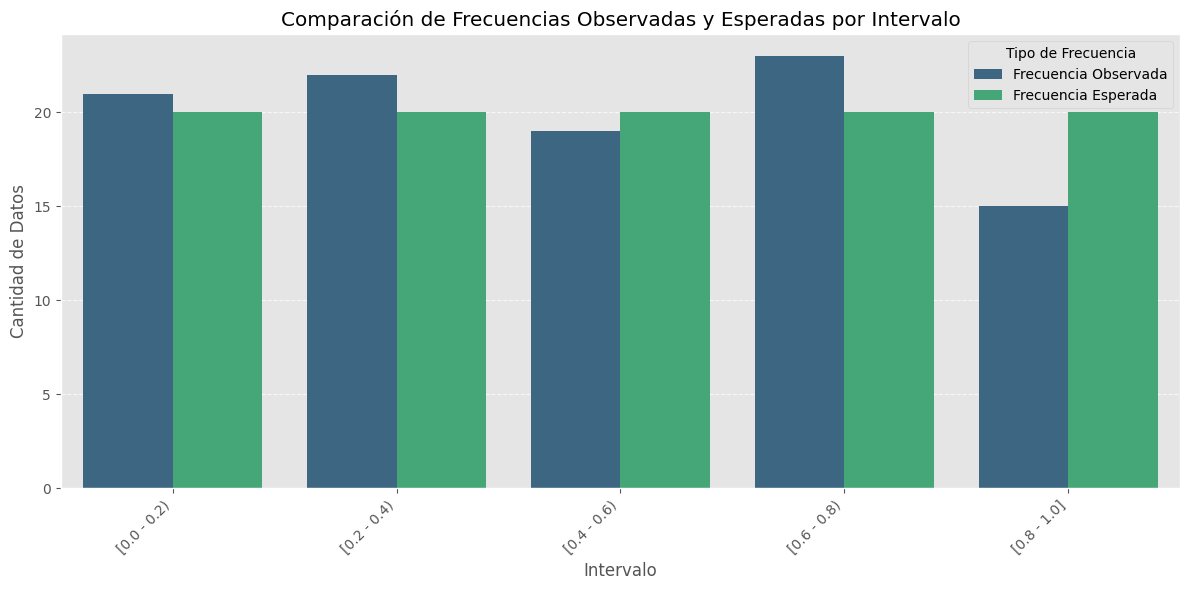

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos para la gráfica si no están ya en el formato deseado
# Unimos fo y fe en un solo DataFrame para facilitar la graficación con seaborn

# Primero, renombramos las columnas para que sean más descriptivas en la leyenda
tabla_grafica = tabla_chi2[['Intervalo', 'fo (Frecuencia Observada)', 'fe (Frecuencia Esperada)']].copy()
tabla_grafica = tabla_grafica.rename(columns={'fo (Frecuencia Observada)': 'Frecuencia Observada', 'fe (Frecuencia Esperada)': 'Frecuencia Esperada'})

# Convertir el DataFrame a formato "long" para seaborn.barplot
tabla_grafica_long = tabla_grafica.melt(id_vars='Intervalo', var_name='Tipo de Frecuencia', value_name='Cantidad')

plt.figure(figsize=(12, 6))
sns.barplot(x='Intervalo', y='Cantidad', hue='Tipo de Frecuencia', data=tabla_grafica_long, palette='viridis')
plt.title('Comparación de Frecuencias Observadas y Esperadas por Intervalo')
plt.xlabel('Intervalo')
plt.ylabel('Cantidad de Datos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()